In [ ]:
# Various functions

# Plot the charge of each pmt

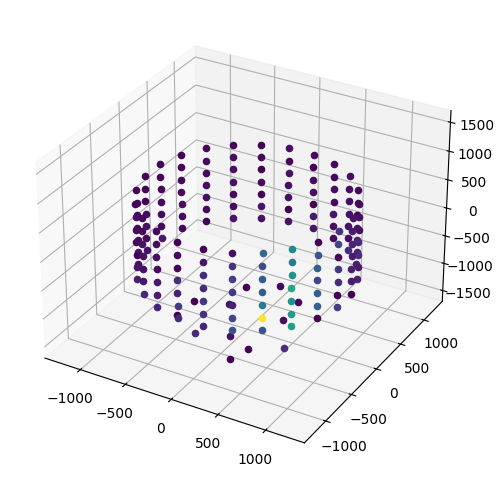

In [36]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import Waveform_Analysis.PMT_POSITIONS as pmtpos
import math

event = 27099
filepath = "/mnt/data/eos/run357/run357.root"

display = {
    "top":False,
    "brl":True,
    "bottom":False,
    "dic": True
}


data = ROOT.RDataFrame("events",filepath)
charges = data.AsNumpy(columns=["charge"])["charge"]
lcns = data.AsNumpy(columns=["lcn"])["lcn"]

visualFig = plt.figure(figsize=(10,6))
axes = visualFig.add_subplot(projection="3d")
axes.set_xlim([-1400,1400])
axes.set_ylim([-1400,1400])
axes.set_zlim([-1700,1700])

pmtCharges = [0]*len(pmtpos.x)

for charge, lcn in zip(charges[event], lcns[event]):
    try:
        pmtCharges[lcn] = charge
    except IndexError:
        pass
# Normalize the colors based on charge
norm = matplotlib.colors.Normalize(vmin=0, vmax=(np.max(pmtCharges)))

for x,y,z, charge in zip(pmtpos.x,pmtpos.y,pmtpos.z, pmtCharges):
    if x == -1:
        continue
    if (z > 900) and display["top"]:
        axes.scatter(x,y,z,marker='o',c=(charge), norm=norm)
        continue
    if (900 > z > -700) and display["brl"]:
        axes.scatter(x,y,z, marker='o', c=(charge), norm=norm)
        continue
    if (-1300<z<-700) and display["bottom"]:
        axes.scatter(x,y,z, marker='o', c=(charge), norm=norm)
        continue
    if (z<-1300) and display["dic"]:
        axes.scatter(x,y,z, marker='o', c=(charge), norm=norm)
        continue
    
    #axes.scatter(x,y,z, marker='o', c=charge, norm=norm)

plt.show()

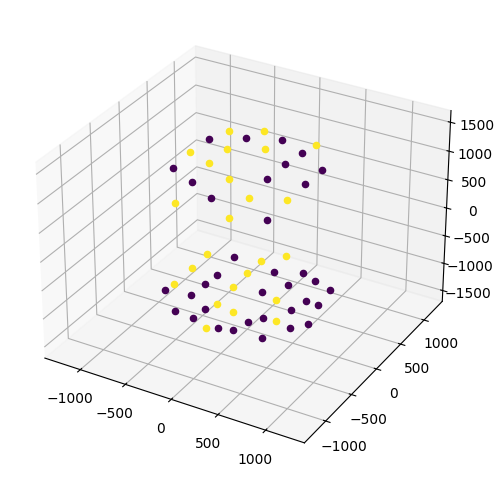

In [31]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import Waveform_Analysis.PMT_POSITIONS as pmtpos

event = 3885
filepath = "/mnt/data/eos/run357/run357.root"

display = {
    "top":True,
    "brl":False,
    "bottom":True,
    "dic": False
}

data = ROOT.RDataFrame("events",filepath)
ncrossings = data.AsNumpy(columns=["ncrossings"])["ncrossings"]
lcns = data.AsNumpy(columns=["lcn"])["lcn"]

visualFig = plt.figure(figsize=(10,6))
axes = visualFig.add_subplot(projection="3d")
axes.set_xlim([-1400,1400])
axes.set_ylim([-1400,1400])
axes.set_zlim([-1700,1700])

pmtCrossings = [0]*len(pmtpos.x)

for crossings, lcn in zip(ncrossings[event], lcns[event]):
    try:
        if crossings >= 1:
            pmtCrossings[lcn] = 1
        else:
            pmtCrossings[lcn] = 0
    except IndexError:
        pass

# Normalize the colors based on charge
norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(pmtCrossings))

for x,y,z, crossing in zip(pmtpos.x,pmtpos.y,pmtpos.z, pmtCrossings):
    if x == -1:
        continue
    if (z > 900) and display["top"]:
        axes.scatter(x,y,z,marker='o',c=crossing, norm=norm)
        continue
    if (900 > z > -700) and display["brl"]:
        axes.scatter(x,y,z, marker='o', c=crossing, norm=norm)
        continue
    if (-1300<z<-700) and display["bottom"]:
        axes.scatter(x,y,z, marker='o', c=crossing, norm=norm)
        continue
    if (z<-1300) and display["dic"]:
        axes.scatter(x,y,z, marker='o', c=crossing, norm=norm)
        continue

plt.show()

[(0.0, 0), (0.0, 17.58231026785706), (0.0, 6.587611607142971), (0.0, 0), (-285.5184014, 1.6943359375), (-302.33780102, 0), (-310.86443885, 4.977678571428648), (-310.86443885, 69.3212890625), (-302.33780102, 0), (-285.5184014, 11.803850446428648), (-607.94853693, 0), (-616.40212121, 5.760323660714324), (-607.94853693, 0), (-582.81965578, 0.6501116071429713), (285.5184014, 1.0114397321429713), (302.33780102, 6.435546875), (310.86443885, 0), (310.86443885, 0), (302.33780102, 0), (285.5184014, 1.0044642857143238), (582.81965578, 0), (607.94853693, 26.316964285714356), (616.40212121, 0), (607.94853693, 0)]
[0, 17.58231026785706, 6.587611607142971, 0, 1.6943359375, 0, 4.977678571428648, 69.3212890625, 0, 11.803850446428648, 0, 5.760323660714324, 0, 0.6501116071429713, 1.0114397321429713, 6.435546875, 0, 0, 0, 1.0044642857143238, 0, 26.316964285714356, 0, 0]


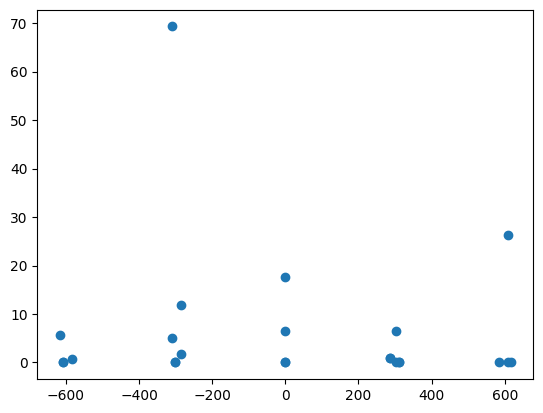

In [44]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import Waveform_Analysis.PMT_POSITIONS as pmtpos
import math

event = 3885
filepath = "/mnt/data/eos/run357/run357.root"

data = ROOT.RDataFrame("events",filepath)
charges = data.AsNumpy(columns=["charge"])["charge"]
lcns = data.AsNumpy(columns=["lcn"])["lcn"]

pmtCharges = [0]*len(pmtpos.x)

for charge, lcn in zip(charges[event], lcns[event]):
    try:
        pmtCharges[lcn] = charge
    except IndexError:
        pass

xDistributionTop = []
xChargeDistributionTop = []

yChargeDistributionTop = []

for x,y,z, charge in zip(pmtpos.x,pmtpos.y,pmtpos.z, pmtCharges):
    if x == -1:
        continue
    if (z > 900):
        xDistributionTop.append((x,charge))
        xChargeDistributionTop.append(charge)
        #axes.scatter(x,y,z,marker='o',c=crossing, norm=norm)
        continue

print(xDistributionTop)
print(xChargeDistributionTop)

plt.scatter(*zip(*xDistributionTop))
